# Visualization with Matplotlib

## General Matplotlib Tips

Antes de profundizar en los detalles de la creación de visualizaciones con Matplotlib, hay algunas cosas útiles que debe saber sobre el uso del paquete.

### Importing Matplotlib

Así como usamos la abreviatura ``np`` para NumPy y la abreviatura ``pd`` para Pandas, usaremos algunas abreviaturas estándar para las importaciones de Matplotlib:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

La interfaz ``plt`` es la que utilizaremos con más frecuencia, como veremos a lo largo de este capítulo.

### Setting Styles

Usaremos la directiva ``plt.style`` para elegir estilos estéticos apropiados para nuestras figuras. Aquí estableceremos el estilo ``ggplot``, que garantiza que los gráficos que creemos utilicen el estilo ggplot de Matplotlib:

In [6]:
plt.style.use('ggplot')

### ``show()`` or No ``show()``? How to Display Your Plots

Una visualización que no puedas ver no será de mucha utilidad, pero la forma en que visualices tus gráficos de Matplotlib depende del contexto.
El mejor uso de Matplotlib difiere según cómo lo uses; en líneas generales, los tres contextos aplicables son usar Matplotlib en un script, en una terminal IPython o en un cuaderno IPython.

#### Plotting from a script

``plt.show()`` inicia un bucle de eventos, busca todos los objetos de figura activos actualmente y abre una o más ventanas interactivas que muestran su figura o figuras.

Por ejemplo, puede tener un archivo llamado *myplot.py* que contenga lo siguiente:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

Luego puede ejecutar este script desde la línea de comandos, lo que generará una ventana que mostrará su figura:

```
$ python myplot.py
```

El comando ``plt.show()`` hace muchas cosas en segundo plano, ya que debe interactuar con el backend gráfico interactivo de su sistema.
Los detalles de esta operación pueden variar en gran medida de un sistema a otro e incluso de una instalación a otra, pero matplotlib hace todo lo posible para ocultarle todos estos detalles.

Una cosa que debe tener en cuenta: el comando ``plt.show()`` debe usarse *solo una vez* por sesión de Python, y se ve con mayor frecuencia al final del script.
El uso de varios comandos ``show()`` puede generar un comportamiento impredecible que depende del backend, y se debe evitar en su mayor parte.

#### Plotting from an IPython shell

Puede resultar muy conveniente utilizar Matplotlib de forma interactiva dentro de un shell de IPython.
IPython está diseñado para funcionar bien con Matplotlib si especifica el modo Matplotlib.
Para habilitar este modo, puede utilizar el comando mágico ``%matplotlib`` después de iniciar ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

En este punto, cualquier comando de trazado ``plt`` hará que se abra una ventana de figura y se podrán ejecutar más comandos para actualizar el gráfico.
Algunos cambios (como modificar las propiedades de las líneas que ya están dibujadas) no se dibujarán automáticamente: para forzar una actualización, utilice ``plt.draw()``.
No es necesario utilizar ``plt.show()`` en modo Matplotlib.

#### Plotting from an IPython notebook

El cuaderno de notas de IPython es una herramienta de análisis de datos interactiva basada en navegador que puede combinar narrativa, código, gráficos, elementos HTML y mucho más en un único documento ejecutable.

La representación gráfica interactiva dentro de un cuaderno de notas de IPython se puede realizar con el comando ``%matplotlib``, y funciona de forma similar al shell de IPython.
En el cuaderno de notas de IPython, también tiene la opción de incrustar gráficos directamente en el cuaderno, con dos opciones posibles:

- ``%matplotlib notebook`` generará gráficos *interactivos* incrustados dentro del cuaderno
- ``%matplotlib inline`` generará imágenes *estáticas* de su gráfico incrustadas en el cuaderno

Para este libro, generalmente optaremos por ``%matplotlib inline``:

In [4]:
%matplotlib inline

Después de ejecutar este comando (solo debe hacerse una vez por kernel/sesión), cualquier celda dentro del cuaderno que cree un gráfico incorporará una imagen PNG del gráfico resultante:

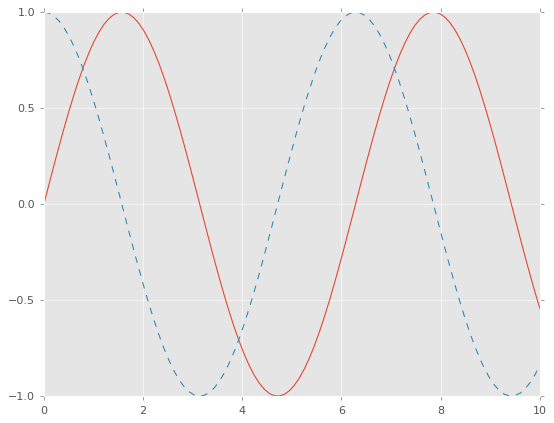

In [7]:
import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()

ax = plt.plot(x, np.sin(x), '-')
ax2= plt.plot(x, np.cos(x), '--');


### Saving Figures to File

Una característica interesante de Matplotlib es la capacidad de guardar figuras en una amplia variedad de formatos.
Para guardar una figura, se puede utilizar el comando ``savefig()``.
Por ejemplo, para guardar la figura anterior como un archivo PNG, puede ejecutar lo siguiente:

In [8]:
fig.savefig('my_figure.png',)

Ahora tenemos un archivo llamado ``my_figure.png`` en el directorio de trabajo actual:

In [9]:
!ls -lh my_figure.png

-rw-r--r--  1 sol  staff    38K Oct 28 11:42 my_figure.png


Para confirmar que contiene lo que creemos que contiene, usemos el objeto ``Image`` de IPython para mostrar el contenido de este archivo:

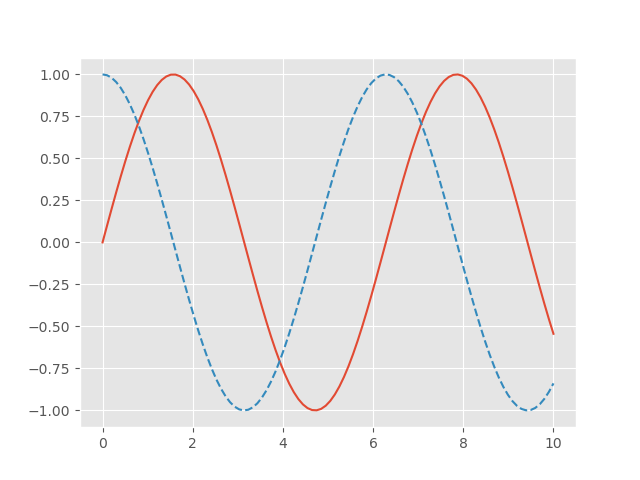

In [8]:
from IPython.display import Image
Image('my_figure.png')

En ``savefig()``, el formato de archivo se infiere de la extensión del nombre de archivo indicado.
Según los backends que haya instalado, hay muchos formatos de archivo diferentes disponibles.
La lista de tipos de archivos compatibles con su sistema se puede encontrar utilizando el siguiente método del objeto de lienzo de figura:

In [10]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

Tenga en cuenta que al guardar su figura, no es necesario utilizar ``plt.show()`` ni los comandos relacionados discutidos anteriormente.

## Two Interfaces for the Price of One

Una característica potencialmente confusa de Matplotlib son sus interfaces duales: una interfaz basada en estados al estilo de MATLAB y una interfaz orientada a objetos más potente. Destacaremos rápidamente las diferencias entre ambas.

#### MATLAB-style Interface

Matplotlib se escribió originalmente como una alternativa de Python para los usuarios de MATLAB, y gran parte de su sintaxis refleja ese hecho.
Las herramientas de estilo MATLAB están contenidas en la interfaz pyplot (``plt``).
Por ejemplo, el siguiente código probablemente les resulte bastante familiar a los usuarios de MATLAB:

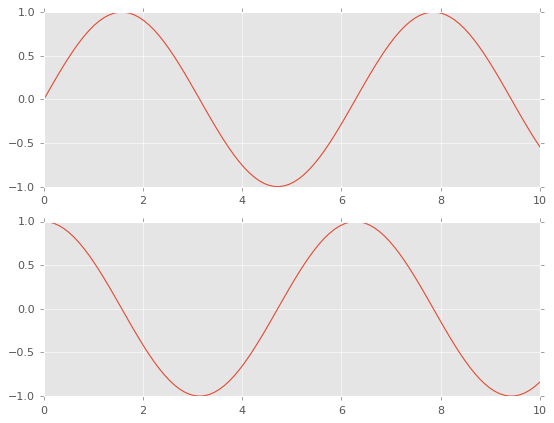

In [11]:
plt.figure() # crea una figura gráfica

# crea el primero de dos paneles y establece el eje actual
plt.subplot(2, 1, 1) # (filas, columnas, número de panel)
plt.plot(x, np.sin(x))

# crea el segundo panel y establece el eje actual
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Es importante tener en cuenta que esta interfaz es *stateful*: lleva un registro de la figura y los ejes "actuales", que son donde se aplican todos los comandos ``plt``.
Puede obtener una referencia a estos utilizando las rutinas ``plt.gcf()`` (obtener la figura actual) y ``plt.gca()`` (obtener los ejes actuales).

Si bien esta interfaz con estado (statefull) es rápida y conveniente para gráficos simples, es fácil encontrarse con problemas.
Por ejemplo, una vez que se crea el segundo panel, ¿cómo podemos volver atrás y agregar algo al primero?
Esto es posible dentro de la interfaz de estilo MATLAB, pero un poco complicado.
Afortunadamente, existe una forma mejor.

#### Object-oriented interface

La interfaz orientada a objetos está disponible para estas situaciones más complicadas y para cuando se desea tener más control sobre la figura.
En lugar de depender de alguna noción de una figura o de ejes "activos", en la interfaz orientada a objetos las funciones de trazado son *métodos* de objetos explícitos "Figura" y "Ejes".
Para recrear el gráfico anterior utilizando este estilo de trazado, se puede hacer lo siguiente:

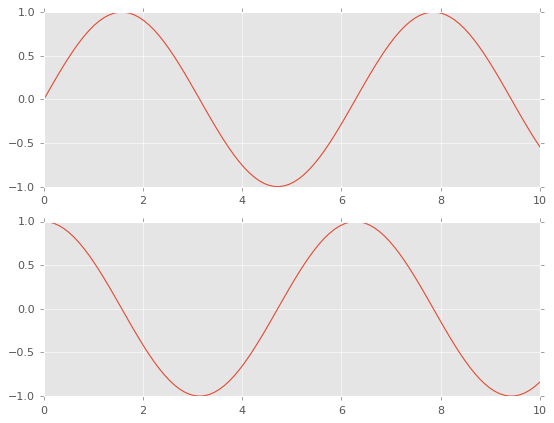

In [12]:
# Primero creamos una cuadrícula de gráficos
# ax será una matriz de dos objetos Axes
fig, ax = plt.subplots(2)

# Llama al método plot() en el objeto apropiado
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

Para gráficos más simples, la elección del estilo a utilizar es en gran medida una cuestión de preferencia, pero el enfoque orientado a objetos puede convertirse en una necesidad a medida que los gráficos se vuelven más complicados.
A lo largo de este capítulo, alternaremos entre las interfaces de estilo MATLAB y las orientadas a objetos, según lo que sea más conveniente.
En la mayoría de los casos, la diferencia es tan pequeña como cambiar ``plt.plot()`` a ``ax.plot()``, pero hay algunos problemas que destacaremos a medida que surjan en las siguientes secciones.